#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.


## Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [1]:
import re 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load your dataset
df = pd.read_csv('Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [3]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

## 1. Basic Data Exploration

Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

In [4]:
rows = df.shape[0]
print('The number of rows is:', rows)
columns = df.shape[1]
print('The number of columns is:', columns)


The number of rows is: 148654
The number of columns is: 13


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [6]:
for column in df.columns:
    data_type = df[column].dtype
    null_value_count = df[column].isnull().sum()
    print(f"Column: {column}\n  Data type: {data_type}\n  Null value count: {null_value_count}\n")


Column: Id
  Data type: int64
  Null value count: 0

Column: EmployeeName
  Data type: object
  Null value count: 0

Column: JobTitle
  Data type: object
  Null value count: 0

Column: BasePay
  Data type: float64
  Null value count: 609

Column: OvertimePay
  Data type: float64
  Null value count: 4

Column: OtherPay
  Data type: float64
  Null value count: 4

Column: Benefits
  Data type: float64
  Null value count: 36163

Column: TotalPay
  Data type: float64
  Null value count: 0

Column: TotalPayBenefits
  Data type: float64
  Null value count: 0

Column: Year
  Data type: int64
  Null value count: 0

Column: Notes
  Data type: float64
  Null value count: 148654

Column: Agency
  Data type: object
  Null value count: 0

Column: Status
  Data type: float64
  Null value count: 148654



## 2. Descriptive Statistics

Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

In [7]:
df['TotalPay'].describe()

count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64

In [8]:
print(f"Salary mean: { df['TotalPay'].describe()['mean'] }")
print(f"Salary median: { df['TotalPay'].describe()['50%'] }")
print(f"Salary mode: { df['TotalPay'].mode().iloc[0] }")
print(f"Salary minimum: { df['TotalPay'].describe()['min'] }")
print(f"Salary maximum: { df['TotalPay'].describe()['max'] }")
print(f"Salary range: { df['TotalPay'].describe()['max'] - df['TotalPay'].describe()['min']}")
print(f"Salary std: { df['TotalPay'].describe()['std'] }")

Salary mean: 74768.32197169267
Salary median: 71426.60999999999
Salary mode: 0.0
Salary minimum: -618.13
Salary maximum: 567595.43
Salary range: 568213.56
Salary std: 50517.00527394987


## 3. Data Cleaning

Handle missing data by suitable method with explain why you use it.

In [9]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,74327.500000,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


for columns: Status and Notes ---> i will drop these two columns because all its values NaN.

In [10]:
df.drop(columns=['Status', 'Notes'], inplace=True)

for columns:  BasePay, OvertimePay, OtherPay and Benefits ---> i will put the median value because there is a big difference between values of mean and median in OvertimePay and OtherPay.

In [11]:
df['BasePay'] = df['BasePay'].fillna(df['BasePay'].median())
df['OvertimePay'] = df['OvertimePay'].fillna(df['OvertimePay'].median())
df['OtherPay'] = df['OtherPay'].fillna(df['OtherPay'].median())
df['Benefits'] = df['Benefits'].fillna(df['Benefits'].median())

## 4. Basic Data Visualization

Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

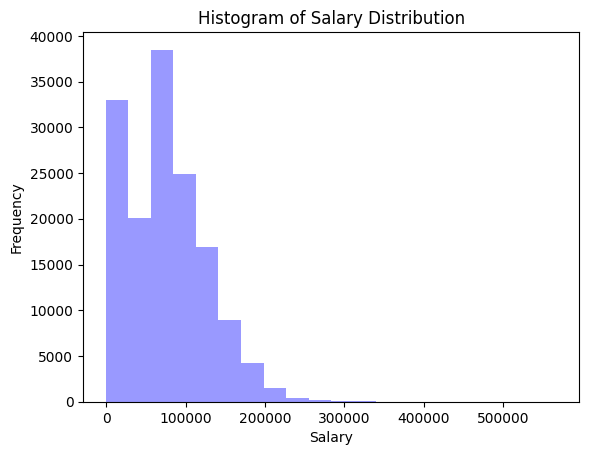

In [12]:
plt.hist(df['TotalPay'],bins=20, color='blue', alpha=0.4)

plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Histogram of Salary Distribution')

plt.show()

In [13]:
df['Department'] = df['JobTitle'].apply(
    lambda x: re.search(r'\((.*?)\)', x).group(1) if re.search(r'\((.*?)\)', x) else x
)

In [14]:
df['Department'].value_counts()

Department
Transit Operator                         7036
Special Nurse                            4389
Registered Nurse                         3736
Public Svc Aide-Public Works             2518
Police Officer 3                         2421
                                         ... 
CHIEF NURSERY SPECIALIST                    1
POWERHOUSE ELECTRICIAN SUPERVISOR II        1
TRIAL DELAY REDUCTION COORDINATOR           1
BUILDING SERVICES TECHNICIAN                1
PRINCIPAL INVESTIGATOR, TAX COLLECTOR       1
Name: count, Length: 2128, dtype: int64

Now we should make the name of department unique for example all names about CIVIL/CRIMINAL to be only CIVIL/CRIMINAL not Civil/Criminal or Cvl&Crmnl, and so on for all departments 

In [57]:
def unique_name(department_name):
    if (department_name == 'Civil/Criminal') | (department_name == 'CIVIL/CRIMINAL') | (department_name == 'Civil & Criminal') | (department_name == 'Cvl&Crmnl'):
        return 'CIVIL & CRIMINAL'
        
    if (department_name == 'Fire Dept') | (department_name == 'Fire Department') | (department_name == 'Firefighter') | (department_name == 'FIREFIGHTER'): 
        return 'FIRE DEPARTMENT'
        
    if (department_name == 'Seasonal') | (department_name == 'SEASONAL'): 
        return 'SEASONAL DEPARTMENT'
        
    if (department_name == 'Police Department') | (department_name == 'Police Officer 3') | (department_name == 'Police Officer 2')| (department_name == 'Police Officer')  | (department_name == 'POLICE OFFICER I') | (department_name == 'POLICE OFFICER II') | (department_name == 'POLICE OFFICER III'): 
        return 'POLICE DEPARTMENT'
        
    if department_name == 'Transit Operator': 
        return 'TRANSIT OPERATOR'
        
    if (department_name == 'Special Nurse') | (department_name == 'SPECIAL NURSE') | (department_name == 'Registered Nurse') | (department_name == 'REGISTERED NURSE') | (department_name == 'Nursing Assistant') | (department_name == 'Nurse Practitioner'): 
        return 'NURSE DEPARTMENT'

    if (department_name == 'Custodian') : 
        return 'CUSTODIAN'

    if (department_name == 'Recreation Leader') : 
        return 'RECREATION LEADER'

    if (department_name == 'Deputy Sheriff') : 
        return 'DEPUTY SHERIFF'

    if (department_name == 'Public Svc Aide-Public Works') | (department_name == 'Public Service Trainee') | (department_name == 'PUBLIC SERVICE AIDE-SPECIAL PROGRAMS') | (department_name == 'Publ Svc Aide-Asst to Prof'): 
        return 'PUBLIC SERVICE DEPARTMENT'
        
    if (department_name == 'General Laborer') : 
        return 'GENERAL LABORER'

    if (department_name == 'Porter') : 
        return 'PORTER'
    
    if (department_name == 'Health Worker 1') | (department_name == 'Health Worker 2') | (department_name == 'Health Worker 3') | (department_name == 'Junior Clerk') | (department_name == 'Clerk') | (department_name == 'Senior Account Clerk') | (department_name == 'Senior Clerk Typist') | (department_name == 'Senior Clerk Typist') | (department_name == 'Clerk Typist') | (department_name == 'Principal Clerk') :  
        return 'WORKERS'
    
    return department_name

In [58]:
print(unique_name('Special Nurse'))

NURSE DEPARTMENT


In [60]:
df['Department'] = df['Department'].apply(
    lambda x: unique_name(x)
)

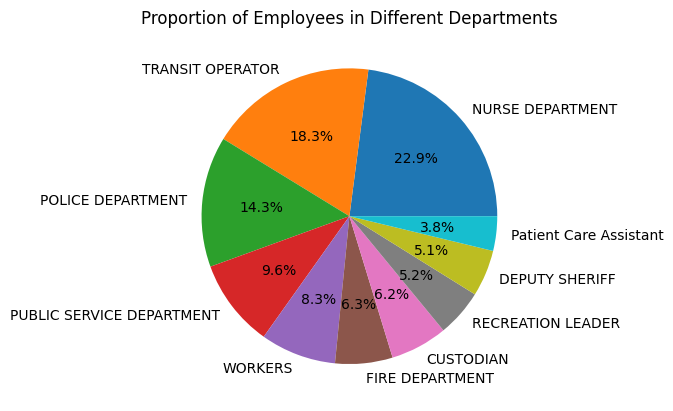

In [63]:
department_counts = df['Department'].value_counts()[:10]
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Employees in Different Departments')
plt.show()

## 5. Grouped Analysis

Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

In [70]:
df['Year'].value_counts()

Year
2014    38123
2013    37606
2012    36766
2011    36159
Name: count, dtype: int64

In [47]:
df.groupby(['Year'])[ ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']].describe().transpose()

Year                             2011           2012           2013  \
BasePay          count   36159.000000   36766.000000   37606.000000   
                 mean    63595.956517   65436.406857   69555.662801   
                 std     40556.774993   41782.209797   43883.674740   
                 min         0.000000    -166.010000      15.830000   
                 25%     33468.125000   34036.580000   38025.535000   
                 50%     62871.720000   64017.370000   67132.280000   
                 75%     90649.765000   92427.927500   97217.345000   
                 max    294580.020000  302578.000000  319275.010000   
OvertimePay      count   36159.000000   36766.000000   37606.000000   
                 mean     4531.065429    5023.417824    5281.641980   
                 std     10501.367793   11431.885357   11998.995040   
                 min         0.000000       0.000000      -0.010000   
                 25%         0.000000       0.000000       0.000000   
                 50%         0.000000       0.000000       0.000000   
                 75%      4215.040000    4691.610000    4707.770000   
                 max    245131.880000  220909.480000  196689.180000   
OtherPay         count   36159.000000   36766.000000   37606.000000   
                 mean     3617.081926    3653.437583    3819.969007   
                 std      7959.889157    7936.873235    8536.254718   
                 min         0.000000       0.000000   -7058.590000   
                 25%         0.000000       9.722500       0.000000   
                 50%       795.600000     920.645000     792.060000   
                 75%      4057.730000    4339.382500    4448.482500   
                 max    400184.250000  245999.410000  202322.370000   
Benefits         count   36159.000000   36766.000000   37606.000000   
                 mean    28628.620000   26439.966967   23829.076572   
                 std         0.000000   15624.924375   14749.075693   
                 min     28628.620000       0.000000     -33.890000   
                 25%     28628.620000   13341.815000   10922.462500   
                 50%     28628.620000   30640.190000   27156.260000   
                 75%     28628.620000   37201.487500   33900.082500   
                 max     28628.620000   84681.820000   86533.210000   
TotalPay         count   36159.000000   36766.000000   37606.000000   
                 mean    71744.103871   74113.262265   77611.443142   
                 std     47498.706594   49523.904319   52854.774783   
                 min         0.000000       0.000000       0.000000   
                 25%     36810.760000   37560.607500   36754.995000   
                 50%     68213.240000   70714.680000   74500.015000   
                 75%    102512.680000  104099.170000  109637.670000   
                 max    567595.430000  362844.660000  347102.320000   
TotalPayBenefits count   36159.000000   36766.000000   37606.000000   
                 mean    71744.103871  100553.229232  101440.519714   
                 std     47498.706594   63555.796681   66390.034642   
                 min         0.000000       1.910000     -33.890000   
                 25%     36810.760000   51743.092500   48259.600000   
                 50%     68213.240000  101751.290000  101969.445000   
                 75%    102512.680000  142396.332500  142793.687500   
                 max    567595.430000  407274.780000  425815.280000   

Year                             2014  
BasePay          count   38123.000000  
                 mean    66564.258561  
                 std     44051.475598  
                 min         0.000000  
                 25%     30148.815000  
                 50%     65055.000000  
                 75%     94731.015000  
                 max    318835.490000  
OvertimePay      count   38123.000000  
                 mean     5401.426941  
                 std     11769.168837  
                 min         0.000000  


In [48]:
(
    df.groupby(['Year'])['TotalPay'].mean().reset_index()
).sort_values('TotalPay')

,Year,TotalPay
0,2011,71744.103871
1,2012,74113.262265
3,2014,75463.918140
2,2013,77611.443142


## 6. Simple Correlation Analysis

Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

In [42]:
df.corr(numeric_only=True)

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
Id,1.000000,-0.204724,-0.081523,-0.100415,-0.313756,-0.211478,-0.092190,0.968171
BasePay,-0.204724,1.000000,0.266688,0.283747,0.797311,0.950689,0.943166,0.033682
OvertimePay,-0.081523,0.266688,1.000000,0.316594,0.263699,0.504860,0.467984,0.027870
OtherPay,-0.100415,0.283747,0.316594,1.000000,0.202007,0.470495,0.422341,-0.002511
Benefits,-0.313756,0.797311,0.263699,0.202007,1.000000,0.773559,0.814595,-0.116167
TotalPay,-0.211478,0.950689,0.504860,0.470495,0.773559,1.000000,0.977313,0.032090
TotalPayBenefits,-0.092190,0.943166,0.467984,0.422341,0.814595,0.977313,1.000000,0.151947
Year,0.968171,0.033682,0.027870,-0.002511,-0.116167,0.032090,0.151947,1.000000


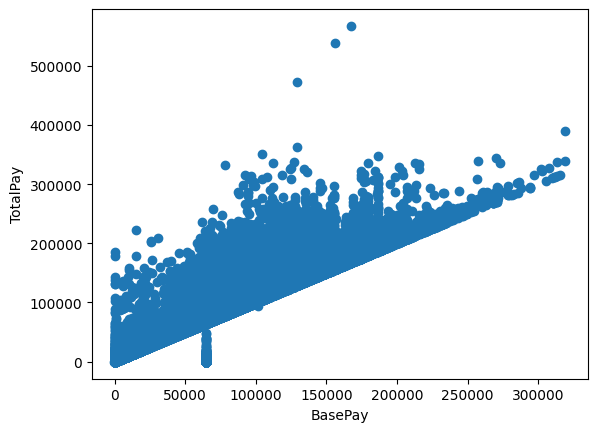

In [68]:
plt.scatter(x=df['BasePay'], y=df['TotalPay'])

plt.xlabel('BasePay')
plt.ylabel('TotalPay')

plt.show()

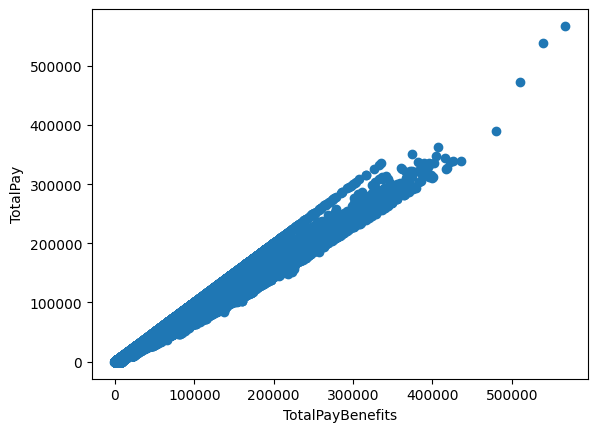

In [69]:
plt.scatter(x=df['TotalPayBenefits'], y=df['TotalPay'])

plt.xlabel('TotalPayBenefits')
plt.ylabel('TotalPay')

plt.show()